# Facet wrap

In [1]:

from plotnine import ggplot, aes, geom_point, labs, facet_wrap, theme
from plotnine.data import mpg

### Facet wrap

`facet_wrap()` creates a collection of plots (facets), where each plot
is differentiated by the faceting variable. These plots are wrapped into
a certain number of columns or rows as specified by the user.

In [2]:
mpg.head()

Basic scatter plot:

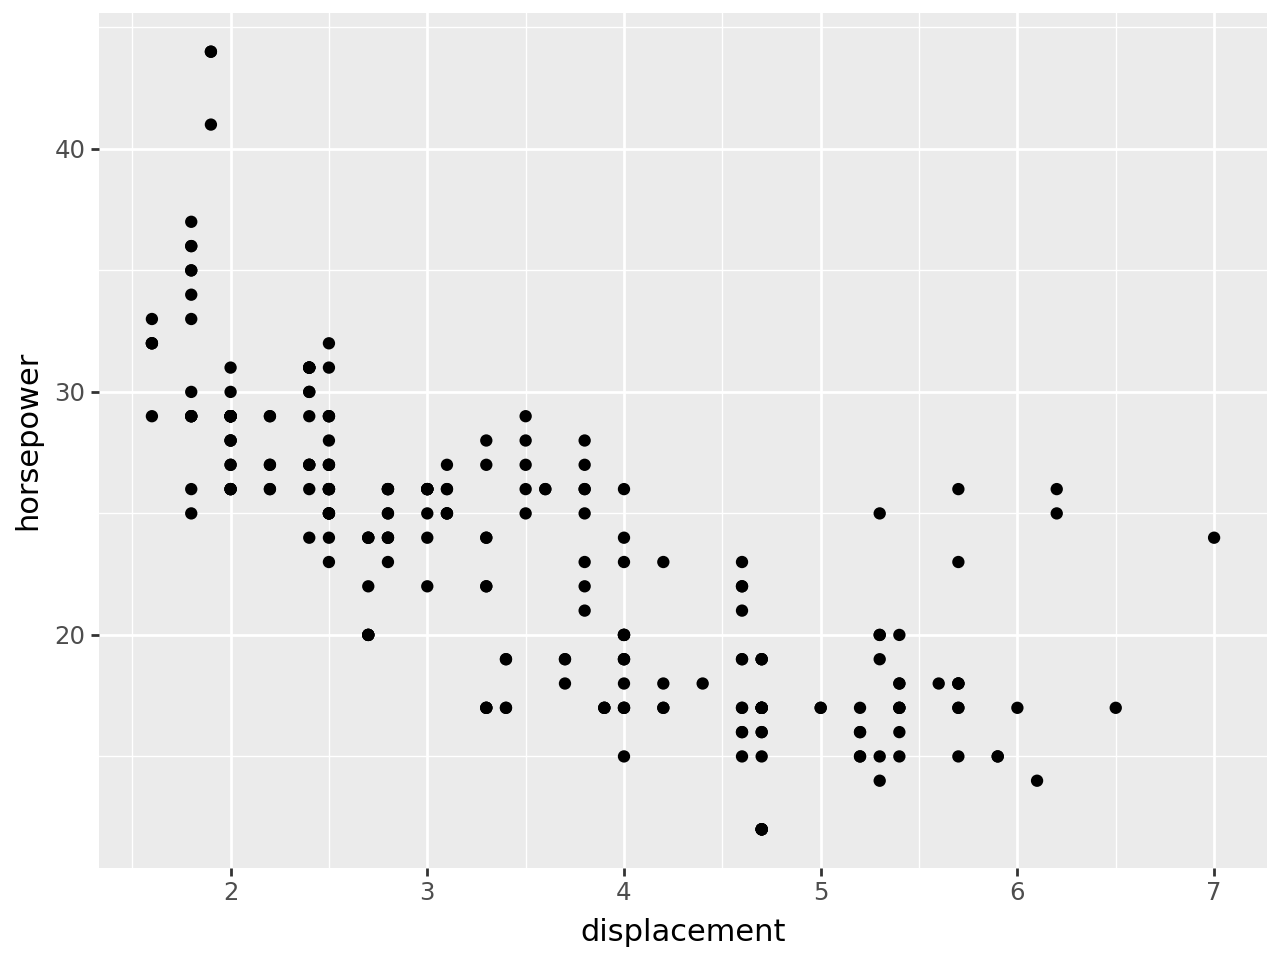

In [3]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + labs(x="displacement", y="horsepower")
)

Facet a discrete variable using `facet_wrap()`:

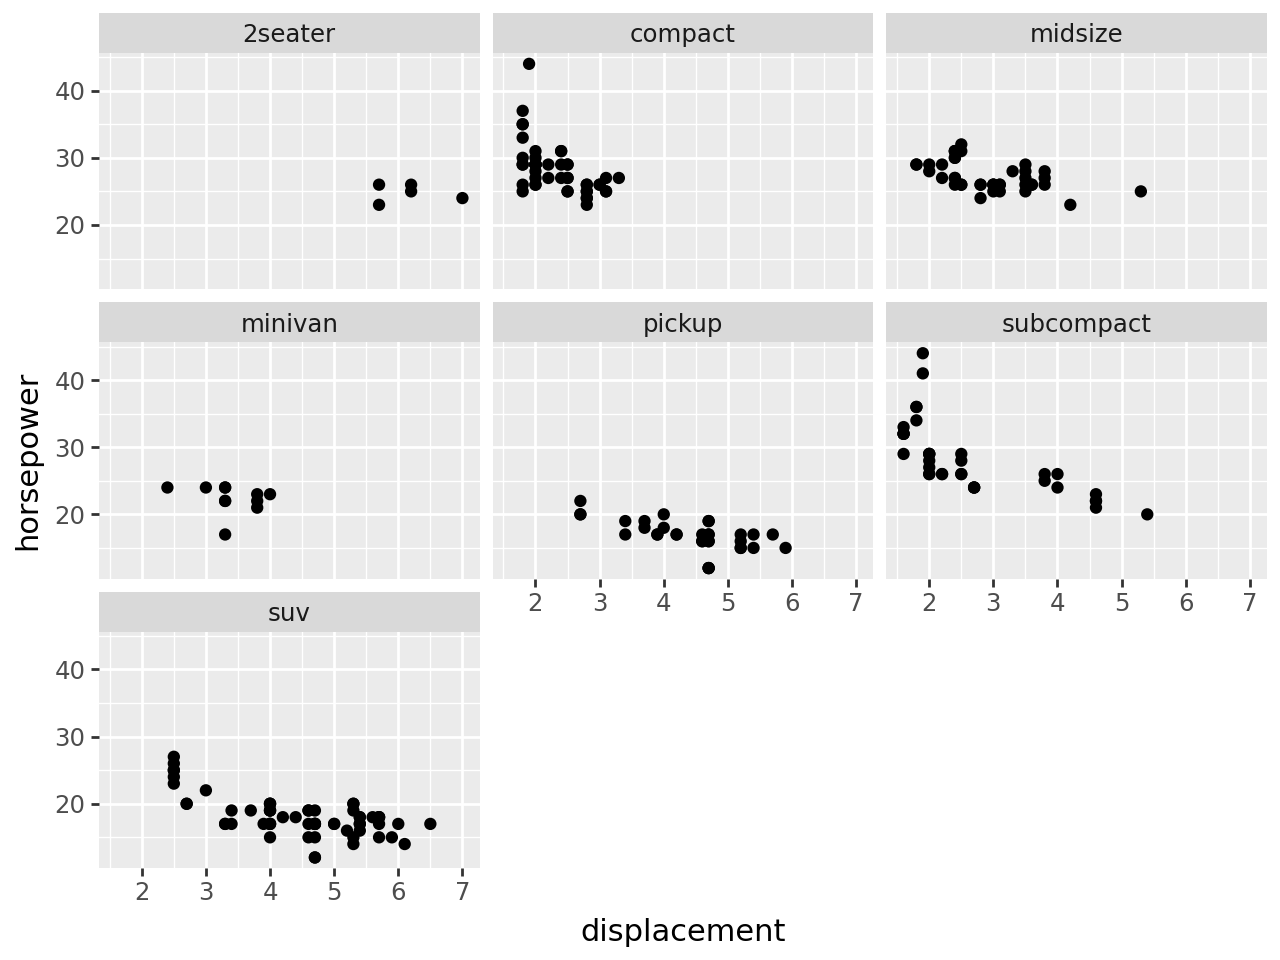

In [4]:
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap("class")
    + labs(x="displacement", y="horsepower")
)

Control the number of rows and columns with the options `nrow` and
`ncol`:

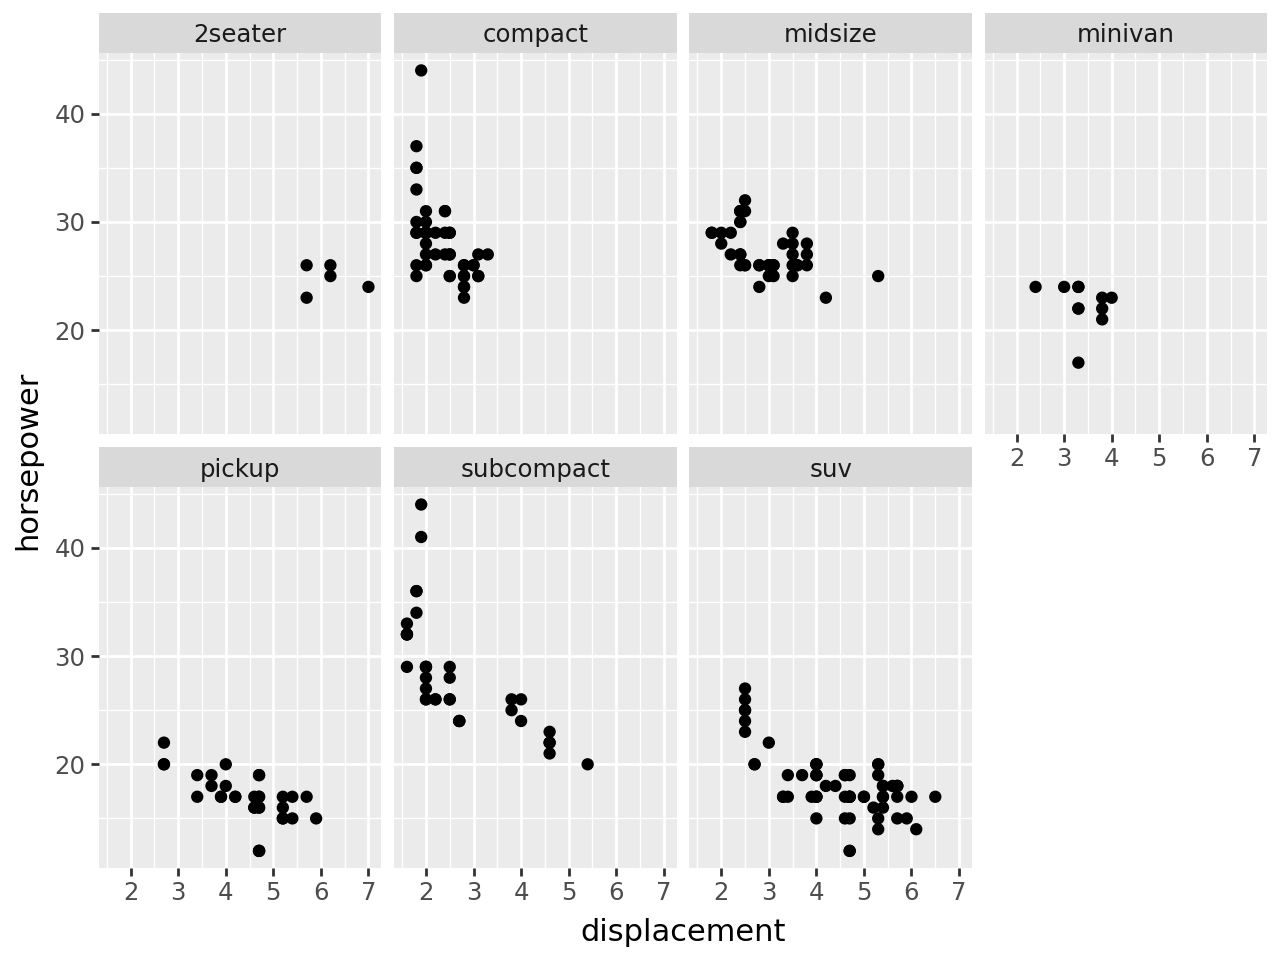

In [5]:
# Selecting the number of columns to display
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap(
        "class",
        ncol=4,  # change the number of columns
    )
    + labs(x="displacement", y="horsepower")
)

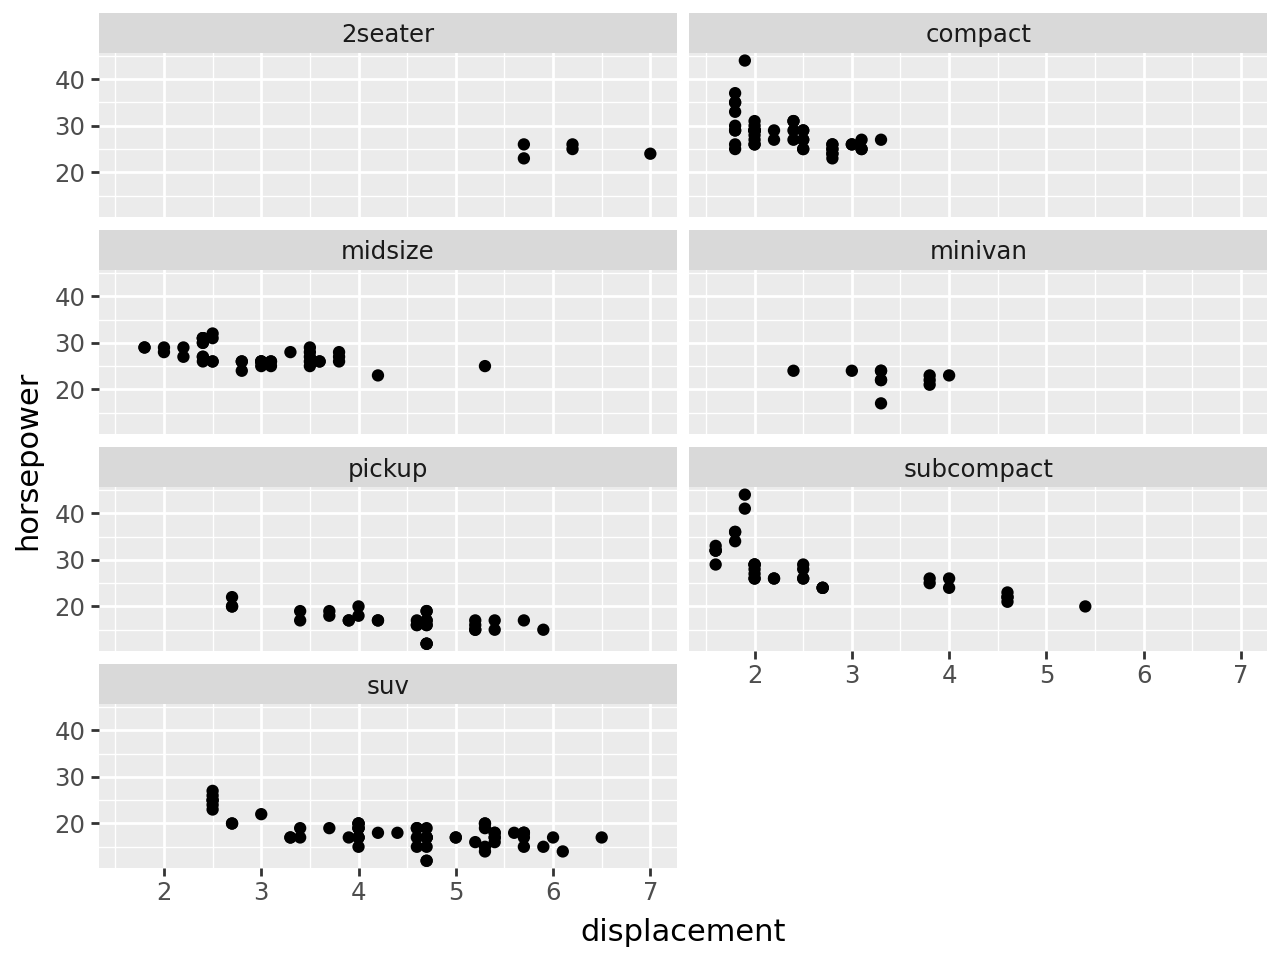

In [6]:
# Selecting the number of rows to display

(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap(
        "class",
        nrow=4,  # change the number of columns
    )
    + labs(x="displacement", y="horsepower")
)

To change the plot order of the facets, reorder the levels of the
faceting variable in the data.

In [7]:
# re-order categories
mpg["class"] = mpg["class"].cat.reorder_categories(
    ["pickup", "suv", "minivan", "midsize", "compact", "subcompact", "2seater"]
)

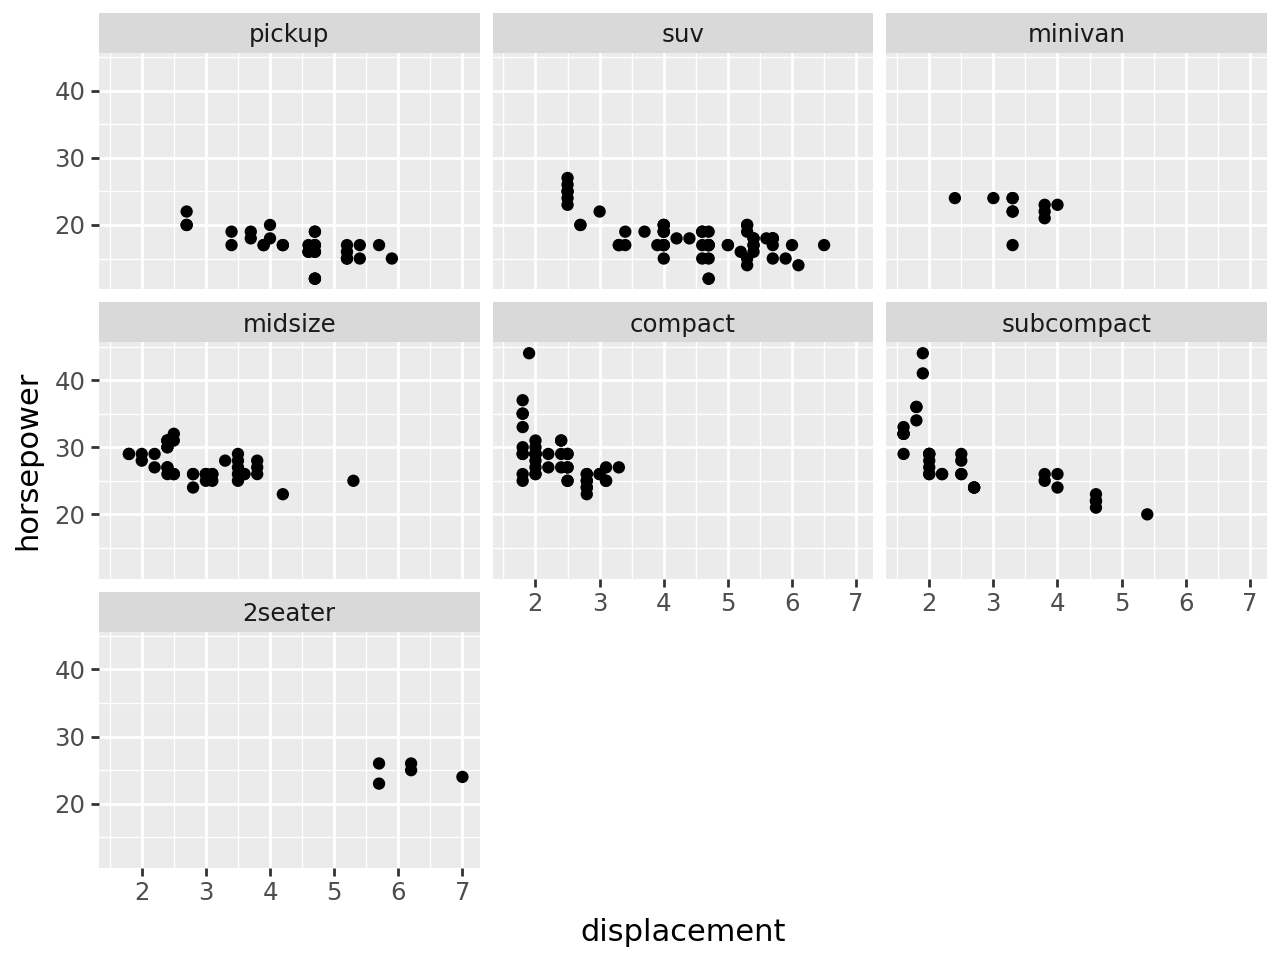

In [8]:
# facet plot with reorded drv category
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap("class")
    + labs(x="displacement", y="horsepower")
)

Ordinarily the facets are arranged horizontally (left-to-right from top
to bottom). However if you would prefer a vertical layout (facets are
arranged top-to-bottom, from left to right) use the `dir` option:

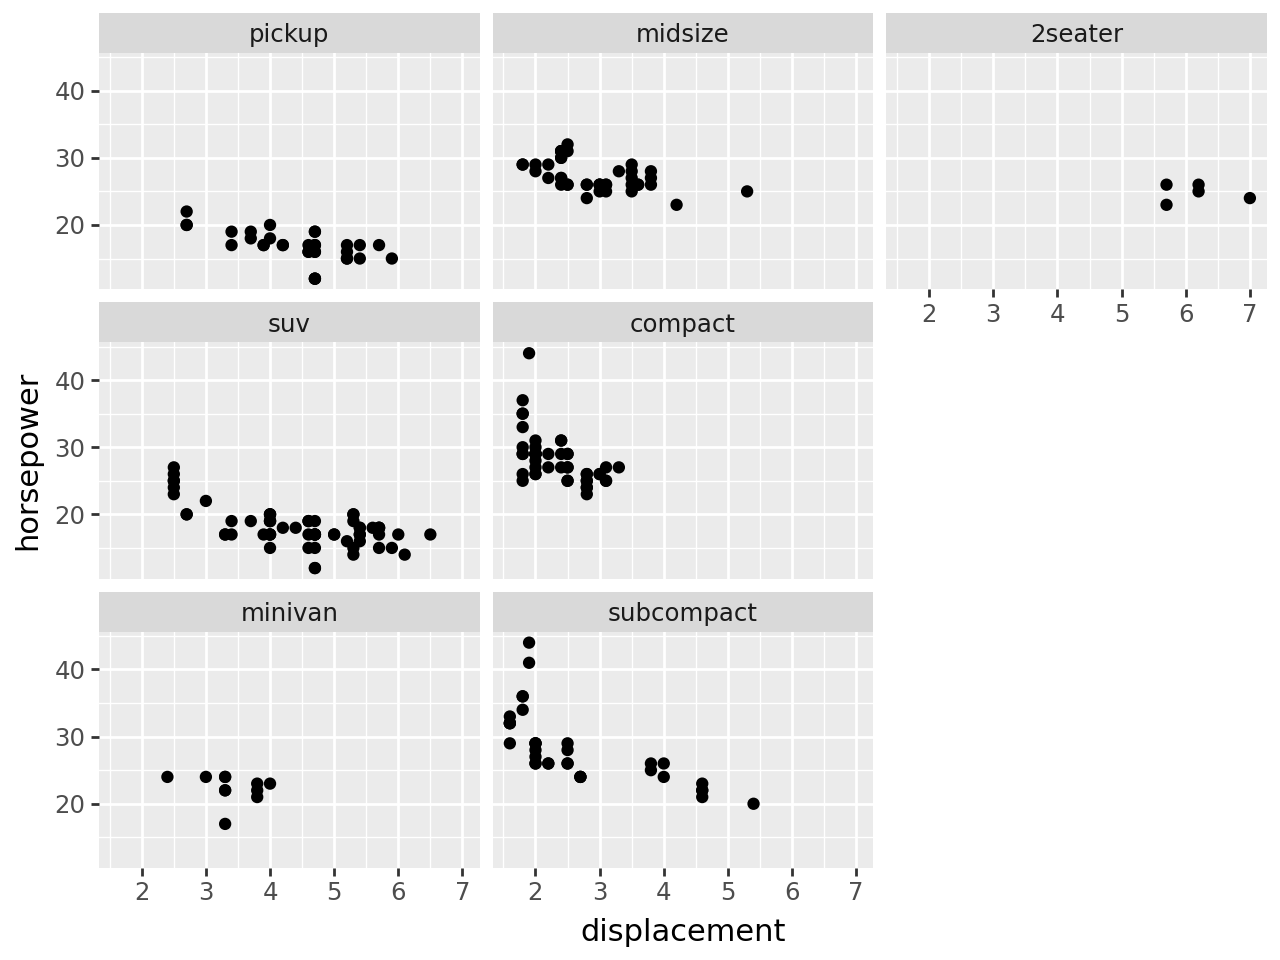

In [9]:
# Facet plot with vertical layout
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap(
        "class",
        dir="v",  # change to a vertical layout
    )
    + labs(x="displacement", y="horsepower")
)

You can choose if the scale of x- and y-axes are fixed or variable. Set
the `scales` argument to `free-y`, `free_x` or `free` for a free scales
on the y-axis, x-axis or both axes respectively. You may need to add
spacing between the facets to ensure axis ticks and values are easy to
read.

A fixed scale is the default and does not need to be specified.

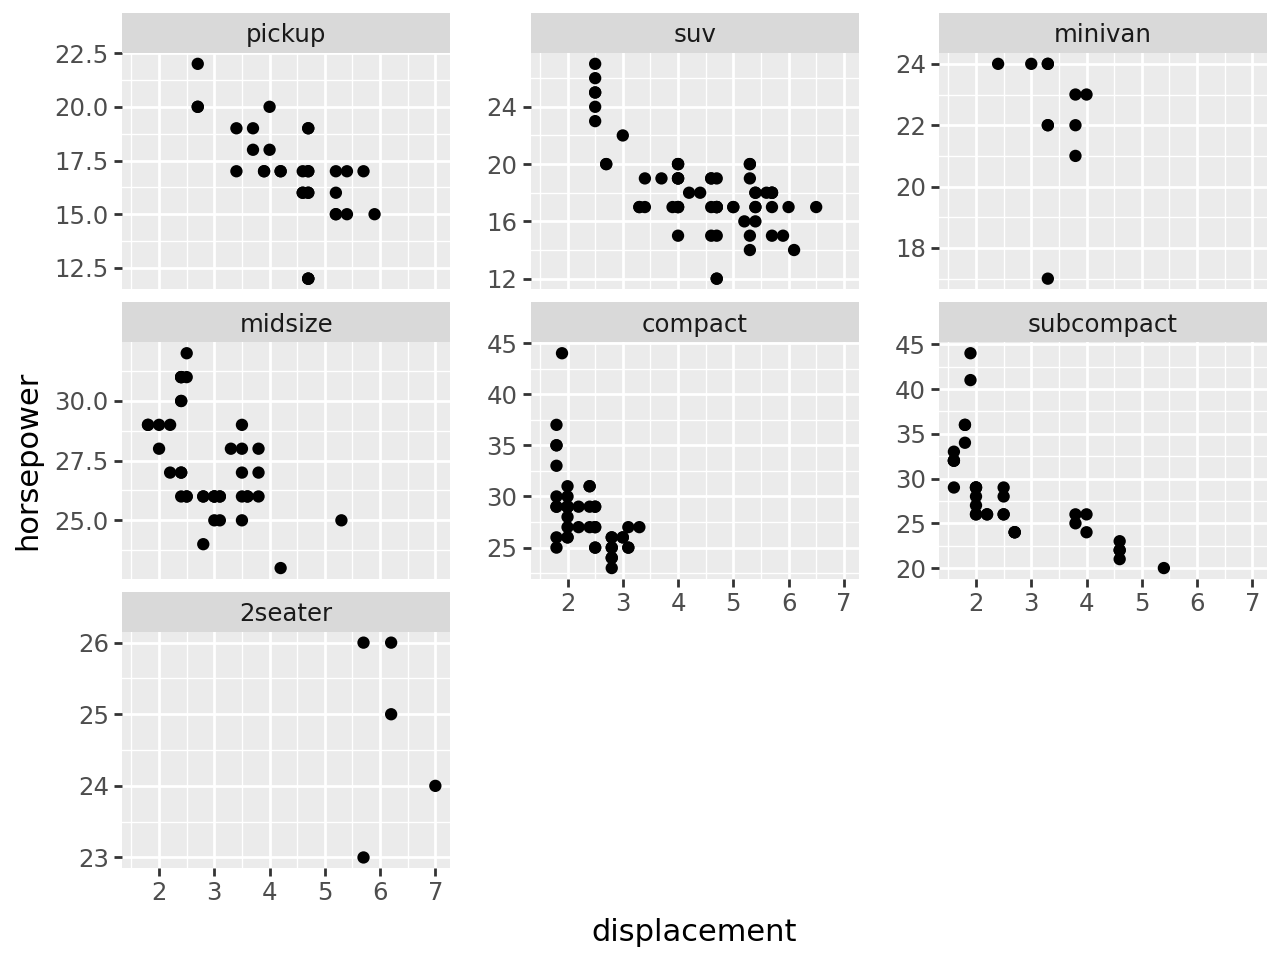

In [10]:
# facet plot with free scales
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap(
        "class",
        scales="free_y",  # set scales so y-scale varies with the data
    )
    + labs(x="displacement", y="horsepower")
)

You can add additional information to your facet labels, by using the
`labeller` argument within the `facet_wrap()` command. Below we use
`labeller = 'label_both'` to include the column name in the facet label.

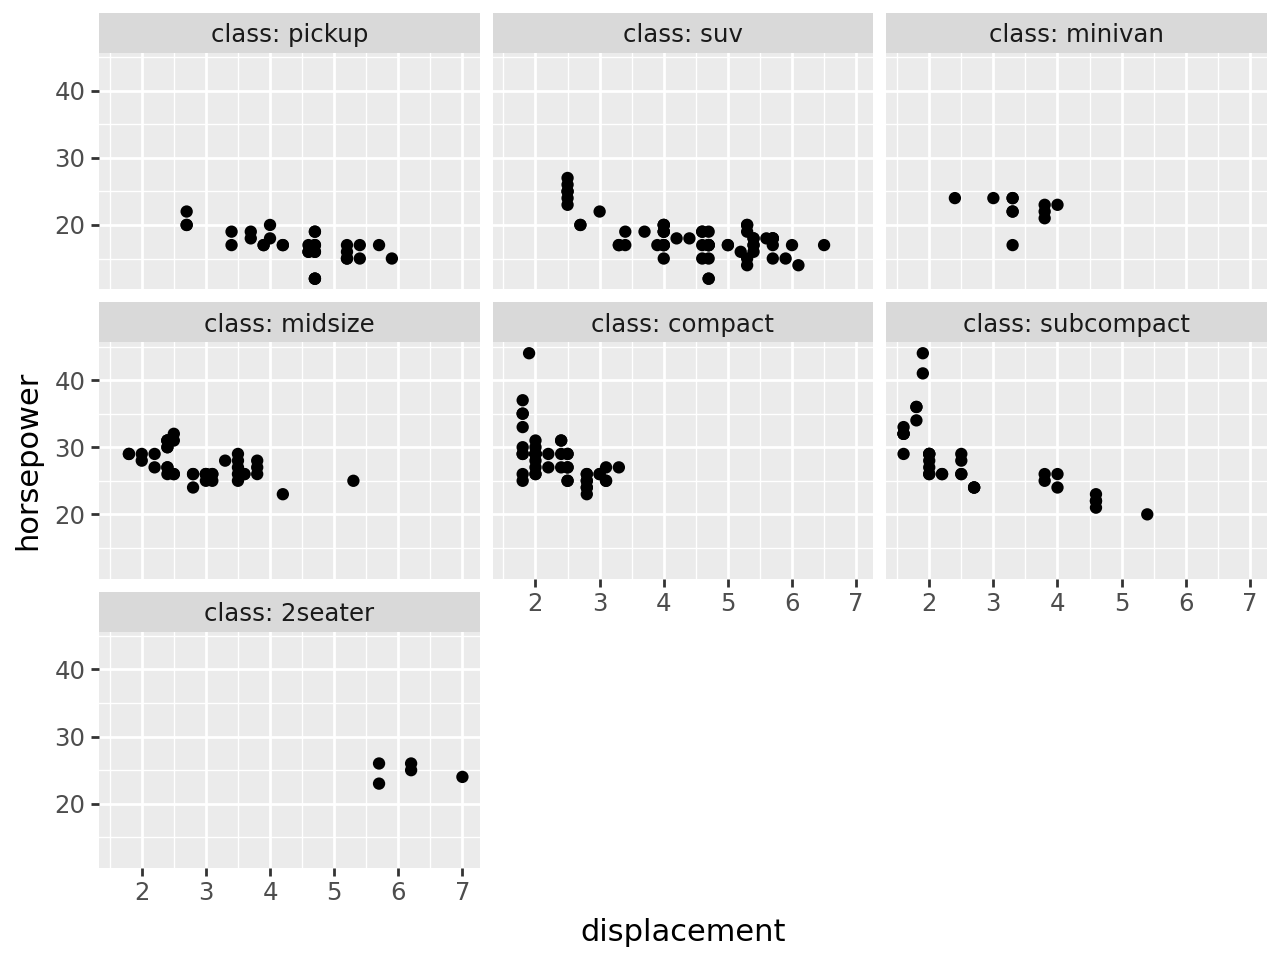

In [11]:
# facet plot with labeller
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap("class", labeller="label_both")
    + labs(x="displacement", y="horsepower")
)

You can add two discrete variables to a facet:

In [12]:
# add additional column for plotting exercise
mpg["transmission"] = mpg["trans"].map(
    lambda x: "auto" if "auto" in x else "man" if "man" in x else ""
)

In [13]:
# inspect new column transmission which identifies cars as having an automatic or manual transmission
mpg.head()

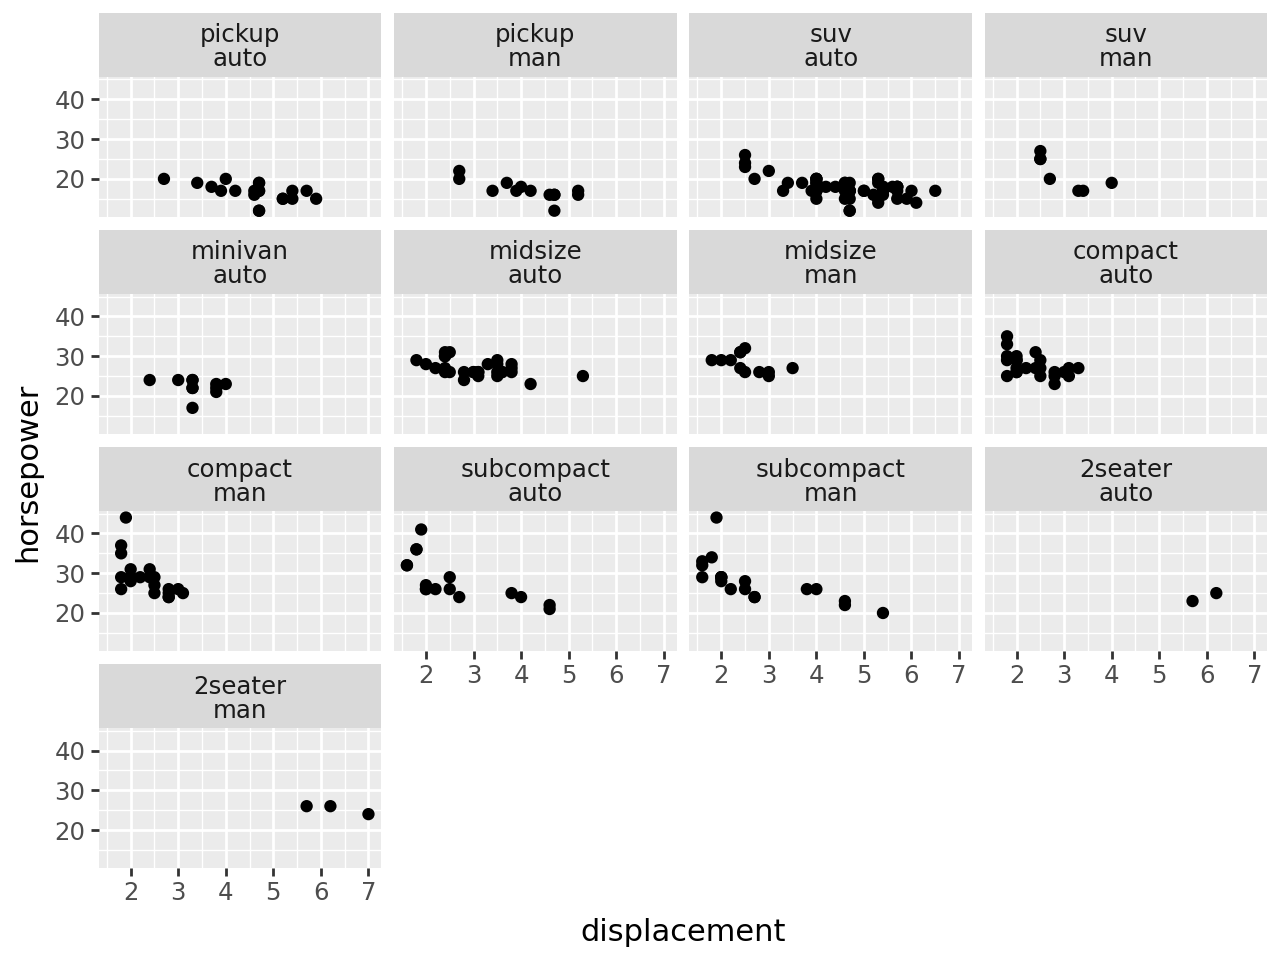

In [14]:
# facet plot with two variables on one facet
(
    ggplot(mpg, aes(x="displ", y="hwy"))
    + geom_point()
    + facet_wrap(["class", "transmission"])  # use a list to add additional facetting variables
    + labs(x="displacement", y="horsepower")
)